# Proyek Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Zulfahmi M. Ardianto
- Laskar ID: A548YBM523



> Proyek ini dibangun untuk membuat model machine learning yang dapat memprediksi kemungkinan seorang karyawan akan keluar (attrition) berdasarkan data historis karyawan yang dimiliki perusahaan. Model ini diharapkan dapat membantu departemen Human Resources (HR) dalam mengidentifikasi karyawan yang berisiko tinggi untuk resign, serta memahami faktor-faktor utama yang memengaruhi keputusan tersebut





# Import

In [2]:
# import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import joblib
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [3]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


# Data Understading

### Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.shape

(1470, 35)

In [7]:
df['Attrition'].value_counts()

,count
Attrition,
0.0,879
1.0,179


## Distribusi Data

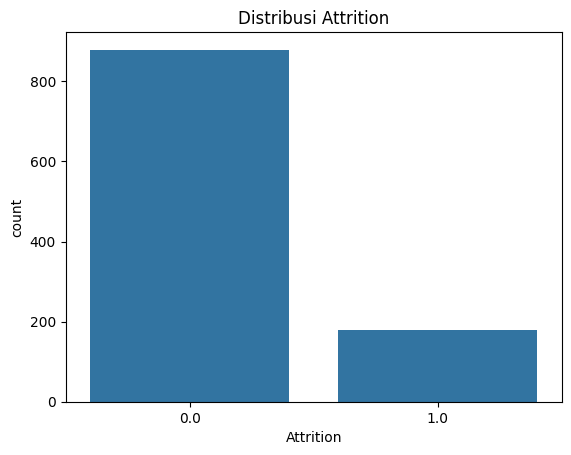

In [8]:
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition')
plt.show()

Nilai 0.0 dan 1.0 pada kolom Attrition biasanya menandakan bahwa:

- 1.0 → Karyawan resign (attrition = YES)

- 0.0 → Karyawan tetap bekerja (attrition = NO)

### Korelasi Fitur Numerik

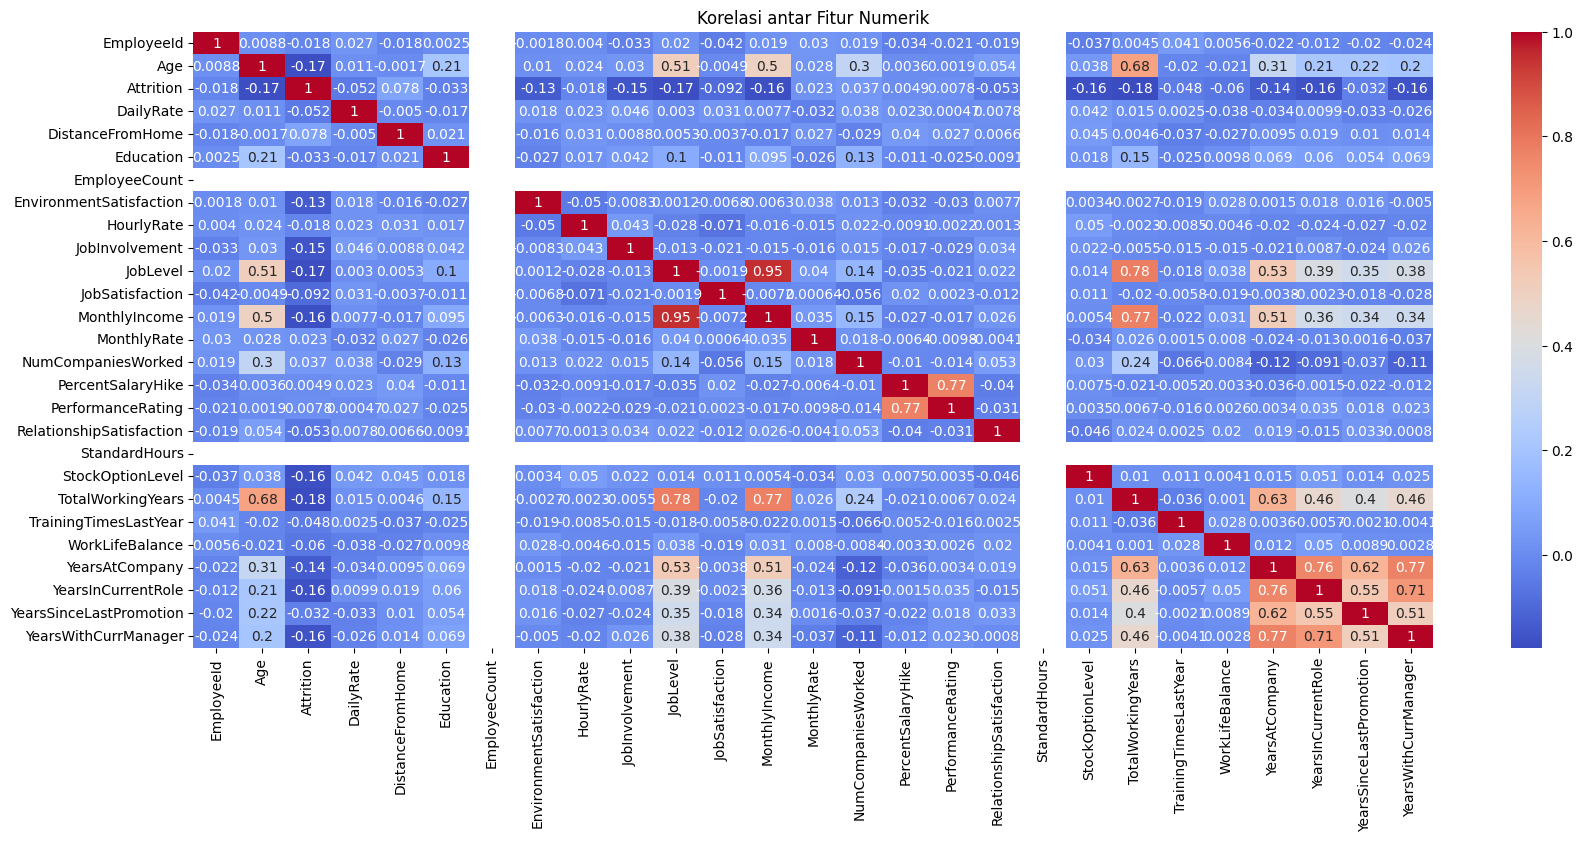

In [9]:
plt.figure(figsize=(20,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

Beberapa hal yang bisa diperhatikan dari data:

- Korelasi Attrition dengan fitur lain mostly negatif dan kecil, misalnya Age (-0.17), MonthlyIncome (-0.16), YearsAtCompany (-0.14). Ini masuk akal karena karyawan yang lebih muda, berpenghasilan rendah, dan baru bergabung lebih berpotensi resign.

- Ada korelasi sangat tinggi antara MonthlyIncome dan JobLevel (sekitar 0.95), juga JobLevel dengan MonthlyRate. Ini juga logis karena posisi lebih tinggi biasanya gaji lebih besar.

- Korelasi antara YearsAtCompany, YearsInCurrentRole, dan YearsWithCurrManager cukup tinggi (>0.7), menunjukkan keterkaitan pengalaman kerja dan durasi kerja di tempat yang sama.

### Visualisasi fitur kagorikal

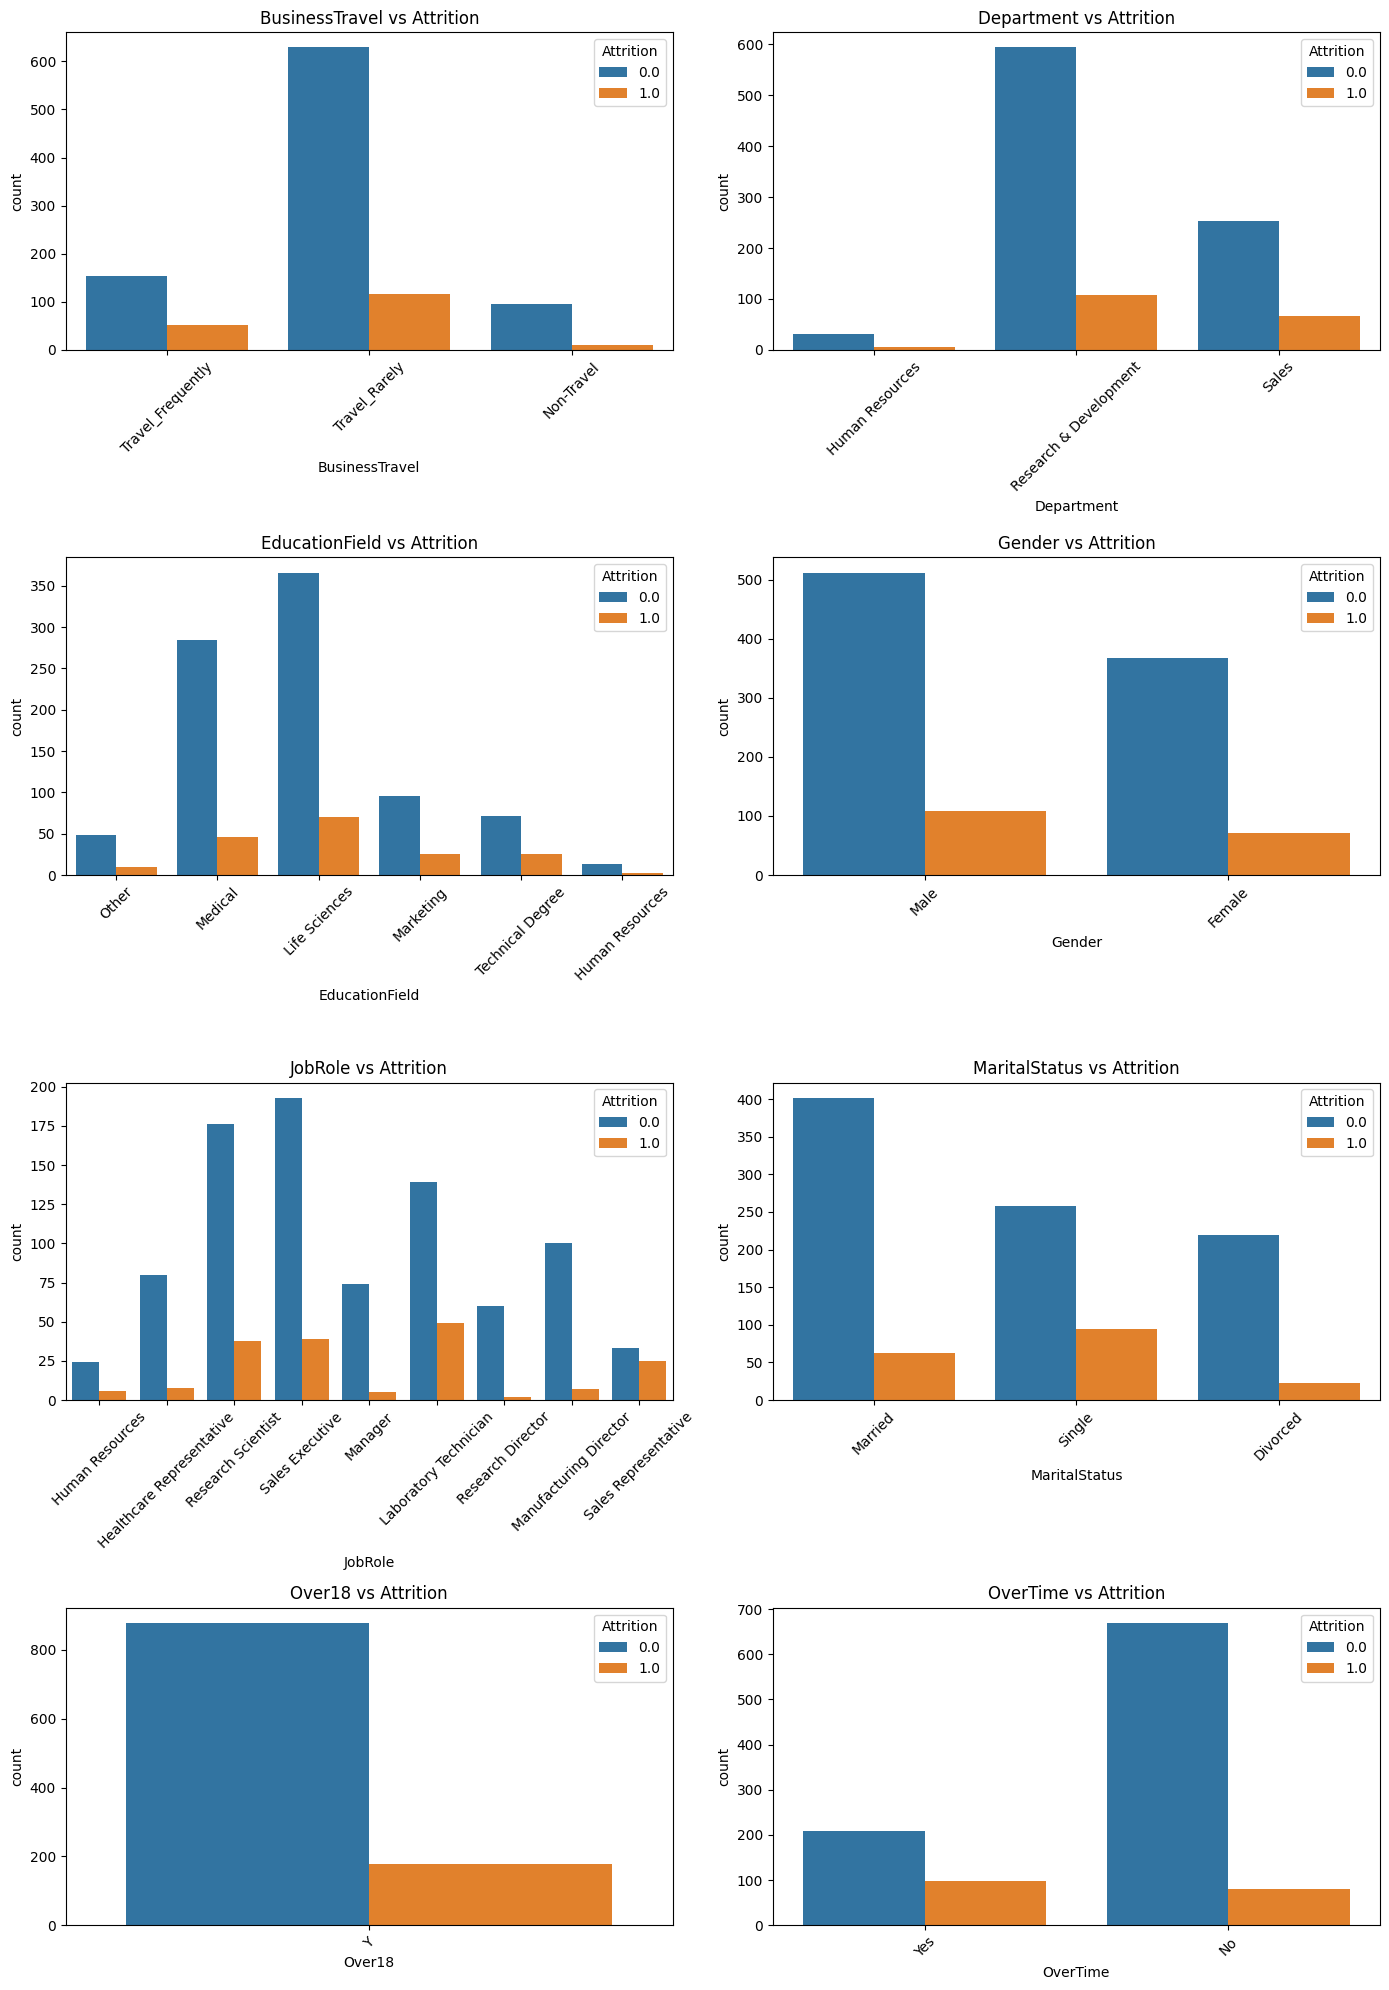

In [10]:
# Pilih fitur kategorikal (object atau kategori)
categorical_cols = df.select_dtypes(include='object').columns

# Buat subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols
plt.figure(figsize=(14, 5 * n_rows))

# Loop tiap kolom kategorikal dan buat countplot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Visualisasi fitur numerical

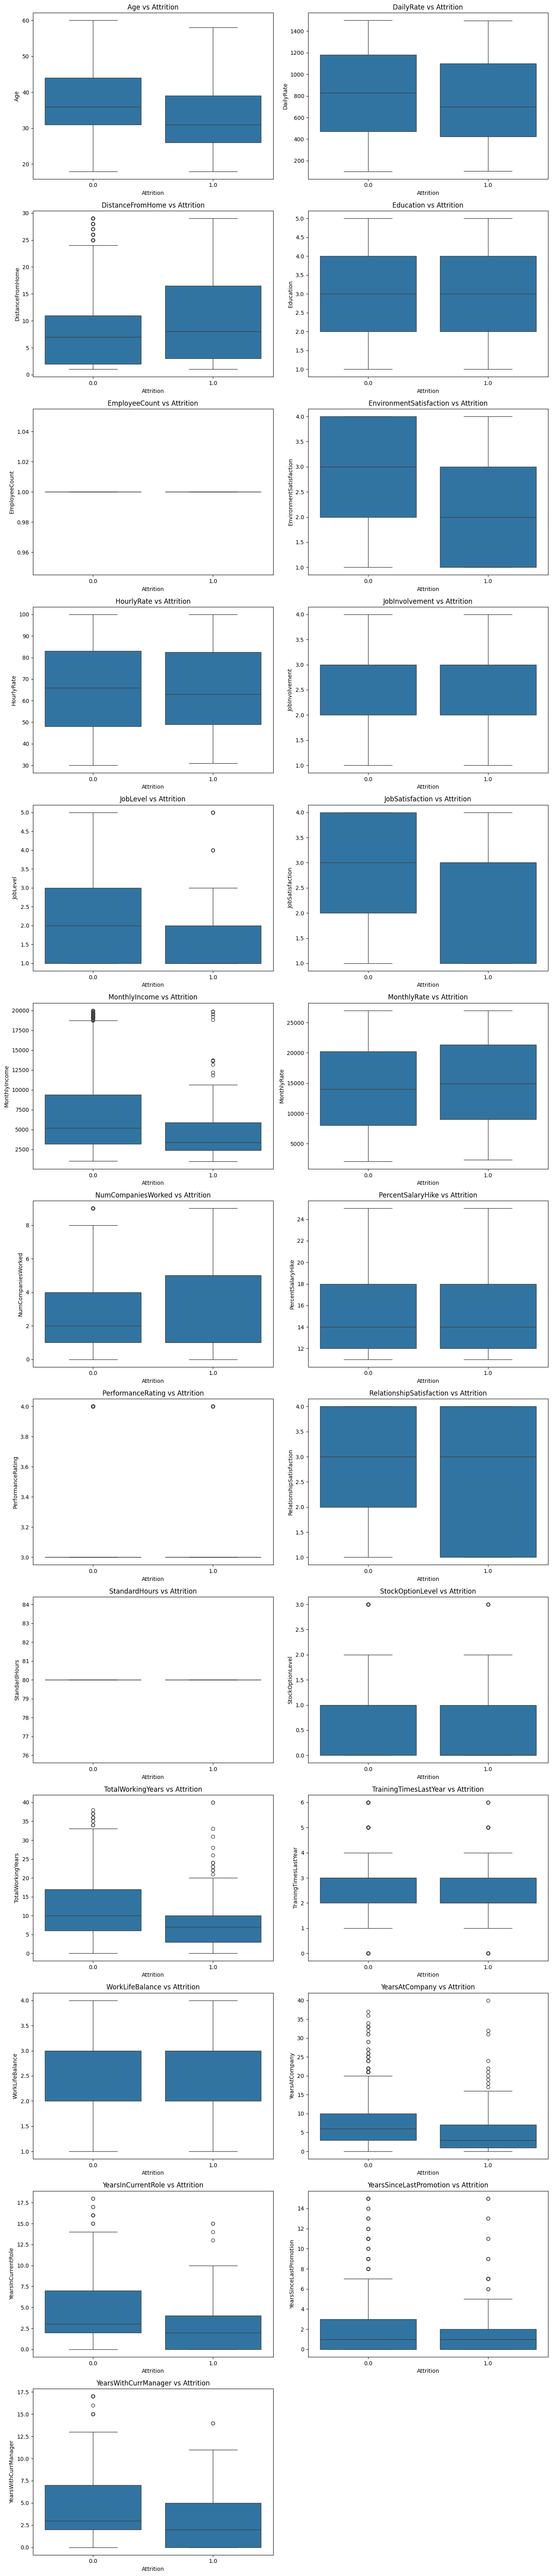

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['EmployeeId', 'Attrition'])

n_cols = 2
n_rows = (len(numerical_cols) + 1) // n_cols
plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f'{col} vs Attrition')

plt.tight_layout()
plt.show()

### Cek missing value

In [12]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


### Cek duplikasi

In [13]:
df.duplicated().sum()

np.int64(0)

# Data Preparation

In [14]:
# salin DataFrame
data = df.copy()

###  Handling Missing Value

In [15]:
# isi nilai yang hilang pada kolom 'Attrition' dengan modus (dari nilai terbanyak)
data['Attrition'] = data['Attrition'].fillna(data['Attrition'].mode()[0])

### Handling Duplikasi

Karena tidak ada duplicate maka tidak diperlukan proses penghapusan data. Ini menunjukkan bahwa data yang tersedia telah bersih dari redundansi dan siap digunakan untuk proses analisis dan pemodelan tanpa risiko perhitungan yang dapat memengaruhi hasil.

### Pemilahan fitur (feature) dan target (label)

In [16]:
# pisahkan fitur dan target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

### Encoding

In [17]:
# menangani data kategorikal dengan one-hot encoding
X = pd.get_dummies(X)

### Normalisasi data

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split data

In [24]:
# oversampling kelas minoritas dengan menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
print(f"Ukuran data training: {X_train.shape}, Ukuran data testing: {X_test.shape}")

Ukuran data training: (2065, 55), Ukuran data testing: (517, 55)


# Modeling

In [25]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:08:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Evaluasi

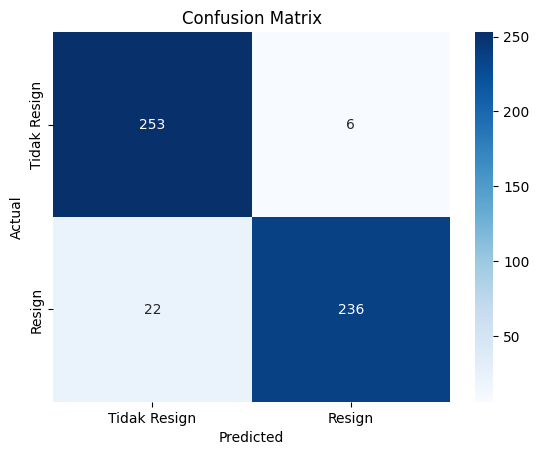

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       259
         1.0       0.98      0.91      0.94       258

    accuracy                           0.95       517
   macro avg       0.95      0.95      0.95       517
weighted avg       0.95      0.95      0.95       517

Accuracy: 0.9458413926499033


In [26]:
# Prediksi data test
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Tidak Resign", "Resign"], yticklabels=["Tidak Resign", "Resign"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

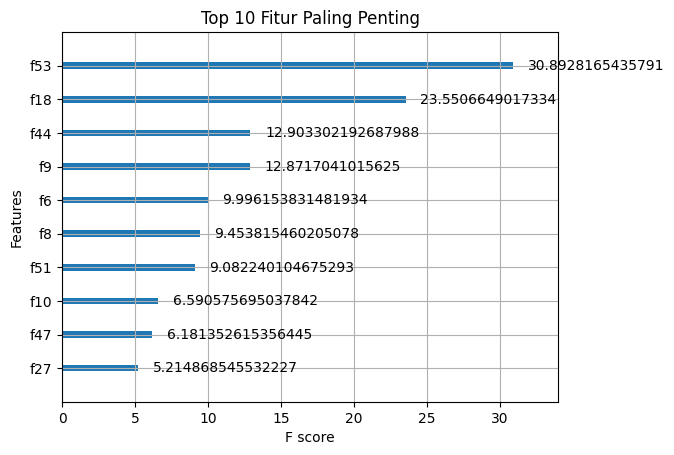

In [27]:
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Fitur Paling Penting')
plt.show()

In [33]:
feature_names = X.columns.tolist()
importances = model.feature_importances_
top_indices = importances.argsort()[::-1][:10]

for i in top_indices:
    print(f"f{i} : {feature_names[i]} -> {importances[i]:.4f}")

f53 : OverTime_No -> 0.1407
f18 : StockOptionLevel -> 0.1073
f44 : JobRole_Manufacturing Director -> 0.0588
f9 : JobLevel -> 0.0586
f6 : EnvironmentSatisfaction -> 0.0455
f8 : JobInvolvement -> 0.0431
f51 : MaritalStatus_Single -> 0.0414
f10 : JobSatisfaction -> 0.0300
f47 : JobRole_Sales Executive -> 0.0282
f27 : BusinessTravel_Travel_Frequently -> 0.0238


In [34]:
# Simpan model
joblib.dump(model, 'model_attrition_xgboost.pkl')

['model_attrition_xgboost.pkl']

# Kesimpulan

In [42]:
df_encoded = X.copy()
df_encoded['Attrition'] = data['Attrition']

fitur_cek = [
    'OverTime_No',
     'OverTime_Yes',
    'StockOptionLevel',
    'JobRole_Manufacturing Director',
    'JobLevel',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'MaritalStatus_Single',
    'JobSatisfaction',
    'JobRole_Sales Executive',
    'BusinessTravel_Travel_Frequently'
]

for fitur in fitur_cek:
    if fitur in df_encoded.columns:
        print(f"\nRata-rata {fitur} berdasarkan Attrition:")
        print(df_encoded.groupby('Attrition')[fitur].mean())
    else:
        print(f"\nFitur '{fitur}' tidak ditemukan di data setelah one-hot encoding.")


Rata-rata OverTime_No berdasarkan Attrition:
Attrition
0.0    0.753679
1.0    0.452514
Name: OverTime_No, dtype: float64

Rata-rata OverTime_Yes berdasarkan Attrition:
Attrition
0.0    0.246321
1.0    0.547486
Name: OverTime_Yes, dtype: float64

Rata-rata StockOptionLevel berdasarkan Attrition:
Attrition
0.0    0.840434
1.0    0.458101
Name: StockOptionLevel, dtype: float64

Rata-rata JobRole_Manufacturing Director berdasarkan Attrition:
Attrition
0.0    0.106894
1.0    0.039106
Name: JobRole_Manufacturing Director, dtype: float64

Rata-rata JobLevel berdasarkan Attrition:
Attrition
0.0    2.119287
1.0    1.664804
Name: JobLevel, dtype: float64

Rata-rata EnvironmentSatisfaction berdasarkan Attrition:
Attrition
0.0    2.767622
1.0    2.391061
Name: EnvironmentSatisfaction, dtype: float64

Rata-rata JobInvolvement berdasarkan Attrition:
Attrition
0.0    2.761425
1.0    2.502793
Name: JobInvolvement, dtype: float64

Rata-rata MaritalStatus_Single berdasarkan Attrition:
Attrition
0.0    



---


## Berikut kesimpulan dari data 10 fitur

1. OverTime (Lembur)
  - Karyawan tidak resign cenderung tidak lembur (75% OverTime_No),

  - Karyawan resign cenderung lebih banyak lembur (54.7% OverTime_Yes).

  - Kesimpulan: Karyawan yang lembur lebih sering berisiko resign lebih tinggi, bisa jadi karena beban kerja lebih berat atau stres.

2. StockOptionLevel (Tingkat Opsi Saham)
  - Karyawan yang tidak resign memiliki rata-rata StockOptionLevel lebih tinggi (0.84 vs 0.46).

  - Kesimpulan: Memiliki opsi saham lebih banyak cenderung membuat karyawan bertahan (tidak resign).

3. JobRole_Manufacturing Director
  - Karyawan yang tidak resign lebih banyak yang berperan sebagai Manufacturing Director (10.7% vs 3.9%).

  - Kesimpulan: Posisi Manufacturing Director cenderung punya tingkat turnover lebih rendah.

4. JobLevel (Level Jabatan)
  - Karyawan yang tidak resign memiliki level jabatan lebih tinggi (2.12 vs 1.66).

  - Kesimpulan: Karyawan dengan level jabatan lebih tinggi cenderung bertahan.

5. EnvironmentSatisfaction (Kepuasan Lingkungan Kerja)
  - Rata-rata kepuasan lingkungan kerja lebih tinggi di karyawan yang tidak resign (2.77 vs 2.39).

  - Kesimpulan: Kepuasan lingkungan kerja yang rendah bisa memicu resign.

6. JobInvolvement (Keterlibatan Kerja)
  - Karyawan yang tidak resign lebih terlibat dengan pekerjaannya (2.76 vs 2.50).

  - Kesimpulan: Keterlibatan kerja yang rendah berhubungan dengan resign.

7. MaritalStatus_Single (Status Menikah)
  - Proporsi karyawan lajang lebih tinggi di yang resign (52.5% vs 29.1%).

  - Kesimpulan: Karyawan lajang cenderung lebih mungkin resign dibanding yang sudah menikah.

8. JobSatisfaction (Kepuasan Kerja)
  - Kepuasan kerja sedikit lebih rendah pada yang resign (2.53 vs 2.76).

  - Kesimpulan: Kepuasan kerja yang lebih rendah berkontribusi pada resign.

9. JobRole_Sales Executive
  - Proporsi Sales Executive hampir sama antara yang resign dan tidak (sekitar 22%).

  - Kesimpulan: Peran ini kurang signifikan berbeda dalam konteks resign.

10. BusinessTravel_Travel_Frequently (Sering Perjalanan Bisnis)
  - Karyawan yang resign lebih banyak yang sering melakukan perjalanan bisnis (28.5% vs 17.5%).

  - Kesimpulan: Sering perjalanan bisnis bisa jadi faktor risiko resign.

